## Larger dataset ⌛

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ROG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### One-hot encoding

In pandas we will use `pd.get_dummies()` function.

In [2]:
# Read in  the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Using One-hot encoding
insurance_onehot = pd.get_dummies(insurance)

insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X & Y values(features and lables)
X = insurance_onehot.drop("charges", axis=1)
y = insurance_onehot["charges"]

In [5]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

### Create training set

In this section we will use `train_test_split`

In [7]:
# Creat training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test), len(X)*0.2

(1338, 1070, 268, 267.6)

### Build a neural network like before 💻

In [8]:
# Set seed
tf.random.set_seed(42)

# 1. Build a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100)
])

# 2. Compile a model
insurance_model.compile(
    loss = "mae",
    optimizer = tf.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

### Check the model of insurance model 🙂

In [9]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 999us/step - loss: 3439.2778 - mae: 3439.2778


[3439.27783203125, 3439.27783203125]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model isn't performing too well...

Let's try and improve it!

To improve our model, we'll run two experiments:

1. ***Add extria layers***
2. ***Train for longer***

#### Model2

In [11]:
# Set seed
tf.random.set_seed(42)

# 1. Build a model
insurance_model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile a model
insurance_model1.compile(
    loss = "mae",
    optimizer = tf.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model1.fit(X_train, y_train, epochs=100, verbose=0)

In [12]:
insurance_model1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 939us/step - loss: 3178.3005 - mae: 3178.3005


[3178.300537109375, 3178.300537109375]

#### Model3

In [13]:
# Set seed
tf.random.set_seed(42)

# 1. Build a model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)
])

# 2. Compile a model
insurance_model2.compile(
    loss = "mae",
    optimizer = tf.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model2.fit(X_train, y_train, epochs=300, verbose=0)

In [14]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 875us/step - loss: 3175.6892 - mae: 3175.6892


[3175.689208984375, 3175.689208984375]

Text(0.5, 0, 'EPS')

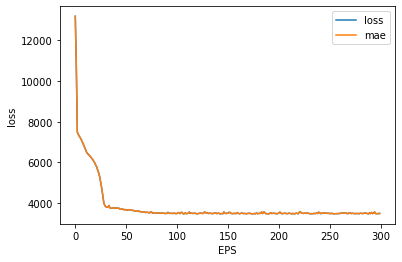

In [15]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("EPS")

> **Question** : How long should you train for? 😱

It depends. Really... it depends the problem you are working on.

TensorFlow has a solution!    

It's called the `EarlyStopping Callback` which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural network tend to prefer **normalization**.

If you are not sure which to use, you can try both. See which performs better.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [26]:
# Read in insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we can borrow few classes from Scikit-Learn.

In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer into our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [43]:
# What does our data look like now?
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [42]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [37]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.

Now! Let's build a neural network model on it and see how it goes.

In [53]:
# Set seed
tf.random.set_seed(42)

# 1. Build a model
insurance_model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10)

])

# 2. Compile a model
insurance_model4.compile(
    loss = "mae",
    optimizer = tf.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model4.fit(X_train_normal, y_train, epochs=300, verbose=0)

In [54]:
# Evalaute our insurance model
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3166.2869 - mae: 3166.2869


[3166.286865234375, 3166.286865234375]